In [2]:
from sampleDiscrete import sampleDiscrete
from bmm import BMM
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load data
data = sio.loadmat('kos_doc_data.mat')
A = np.array(data['A'])
B = data['B']
V = data['V']

In [66]:
perplexity, swk = BMM(A, B, K, alpha, gamma)
print(perplexity)
I = 20
indices = np.argsort(-swk, axis=0)
indices = indices[:20, :]
top_words = V[indices]
for topic in top_words[:, :, 0].T: #Transpose of the first 2D matrix in top_words (20, 20, 1)
    print('\n')
    for word in topic:
        print(word[0])

2092.2341814052006


kerry
dean
edwards
clark
primary
poll
democratic
gephardt
lieberman
bush
percent
iowa
polls
numbers
results
sharpton
kucinich
undecided
latest
state


bush
jobs
bunning
tax
economy
percent
deficit
economic
administration
debate
job
budget
campaign
years
year
growth
billion
cuts
democrats
gdp


bush
kerry
service
guard
records
national
military
bushs
texas
kerrys
house
vietnam
white
swift
campaign
duty
boat
air
war
star


kerry
dean
democratic
bush
campaign
party
edwards
democrats
primary
people
media
time
general
candidates
million
john
state
iowa
president
political


gotv
luntz
bush
trade
pollster
msnbc
media
republican
republicans
reported
williams
frank
gop
general
news
monday
war
sanctions
memory
ballots


nader
ballot
voters
general
republican
party
election
voter
state
people
republicans
signatures
vote
democratic
ohio
bush
naders
campaign
county
registration


november
poll
house
senate
republicans
polls
bush
governor
electoral
account
turnout
primary
democ

In [67]:
top_words[:, :, 0].T

array([[array(['kerry'], dtype='<U5'), array(['dean'], dtype='<U4'),
        array(['edwards'], dtype='<U7'), array(['clark'], dtype='<U5'),
        array(['primary'], dtype='<U7'), array(['poll'], dtype='<U4'),
        array(['democratic'], dtype='<U10'),
        array(['gephardt'], dtype='<U8'),
        array(['lieberman'], dtype='<U9'), array(['bush'], dtype='<U4'),
        array(['percent'], dtype='<U7'), array(['iowa'], dtype='<U4'),
        array(['polls'], dtype='<U5'), array(['numbers'], dtype='<U7'),
        array(['results'], dtype='<U7'),
        array(['sharpton'], dtype='<U8'),
        array(['kucinich'], dtype='<U8'),
        array(['undecided'], dtype='<U9'),
        array(['latest'], dtype='<U6'), array(['state'], dtype='<U5')],
       [array(['bush'], dtype='<U4'), array(['jobs'], dtype='<U4'),
        array(['bunning'], dtype='<U7'), array(['tax'], dtype='<U3'),
        array(['economy'], dtype='<U7'), array(['percent'], dtype='<U7'),
        array(['deficit'], dtype=

In [68]:
word_counts = np.zeros(np.max(A[:, 1]))  # Create an array of zeros for each word

for _, word_id, count in A:
    word_counts[word_id - 1] += count  # Subtract 1 if word_id starts from 1

# Normalize the counts to get probabilities
total_word_count = np.sum(word_counts)
word_probs = word_counts / total_word_count

In [69]:
word_probs

array([1.47113991e-05, 6.25234463e-05, 4.78120472e-05, ...,
       6.25234463e-05, 1.17691193e-04, 2.20670987e-05])

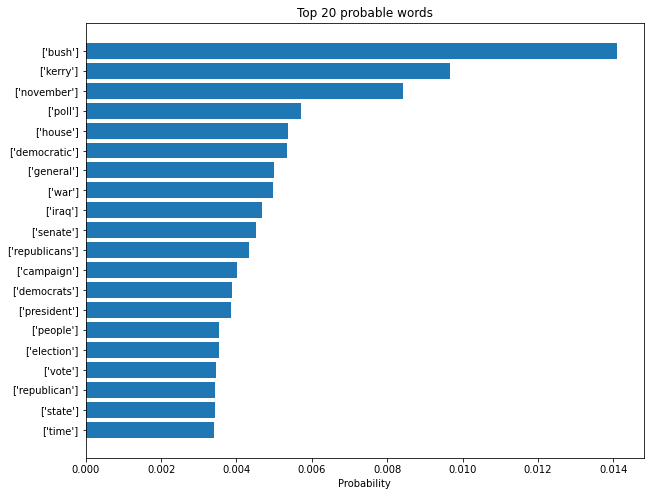

In [70]:
counts = np.sum(swk, axis=1)  # Sum over topics to get total counts for each word
total_words = np.sum(counts)  # Total number of words
word_probs = counts / total_words  # Convert counts to probabilities

# Find the top 20 words
top_word_indices = np.argsort(word_probs)[-20:]
top_word_probs = word_probs[top_word_indices]
top_counts = V[top_word_indices].flatten()

plt.figure(figsize=(10, 8))
plt.barh(range(20), top_word_probs)
plt.yticks(range(20), top_counts)
plt.xlabel('Probability')
plt.title('Top 20 probable words')
plt.show()

In [24]:
from tqdm import tqdm


W = np.max([np.max(A[:, 1]), np.max(B[:, 1])])  # total number of unique words
D = np.max(A[:, 0])  # number of documents in A

# Initialization: assign each document a mixture component at random
word_counts = np.zeros(W)  # counts of each word

# Populate the count matrices by looping over documents
for doc in tqdm(range(D)):
    doc_indices = np.where(A[:, 0] == doc+1)  # get all occurrences of document d in the training data
    word_ids = np.array(A[doc_indices, 1])  # unique word id's in document d
    counts = np.array(A[doc_indices, 2])  # counts of words in document d
    word_counts[word_ids-1] += counts  # number of times w is assigned to component k
print("complete")

num_words = np.sum(word_counts).astype(int)
word_frequencies = np.true_divide(word_counts, num_words)

print("W={} distinct words".format(W))
print("N={} total words".format(num_words))

100%|██████████| 2000/2000 [00:00<00:00, 10316.72it/s]

complete
W=6906 distinct words
N=271898 total words


[0.0140972  0.00967642 0.00841124 0.00570067 0.00535863 0.00534392
 0.00498716 0.00497245 0.00468558 0.00450537 0.00432883 0.00401989
 0.00388749 0.00384335 0.00353441 0.00352706 0.00344615 0.00343143
 0.00342776 0.00340937]


Text(0, 0.5, 'Word')

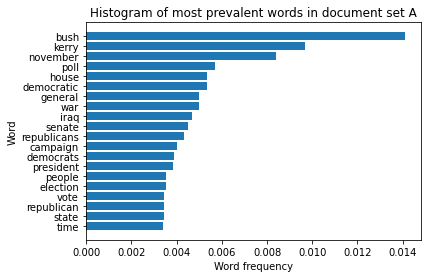

In [25]:
import matplotlib.pyplot as plt


cutoff = 20
top_word_indices = np.argsort(word_frequencies)[::-1][:cutoff]
top_frequencies = word_frequencies[top_word_indices]
top_words = [word[0] for word in V[top_word_indices, 0]]

print(top_frequencies)

plt.barh(top_words[::-1], top_frequencies[::-1])
plt.title("Histogram of most prevalent words in document set A")
plt.xlabel("Word frequency")
plt.ylabel("Word")

In [36]:
a = 100
prior_counts = a * np.ones(W)

posterior_counts = word_counts + prior_counts
total_count = np.sum(posterior_counts)

posterior_freqs = np.true_divide(posterior_counts, total_count)


[0.00408624 0.00283741 0.00248001 0.00171429 0.00161767 0.00161351
 0.00151273 0.00150857 0.00142754 0.00137663 0.00132676 0.00123948
 0.00120208 0.00118961 0.00110234 0.00110026 0.0010774  0.00107325
 0.00107221 0.00106702]


Text(0, 0.5, 'Word')

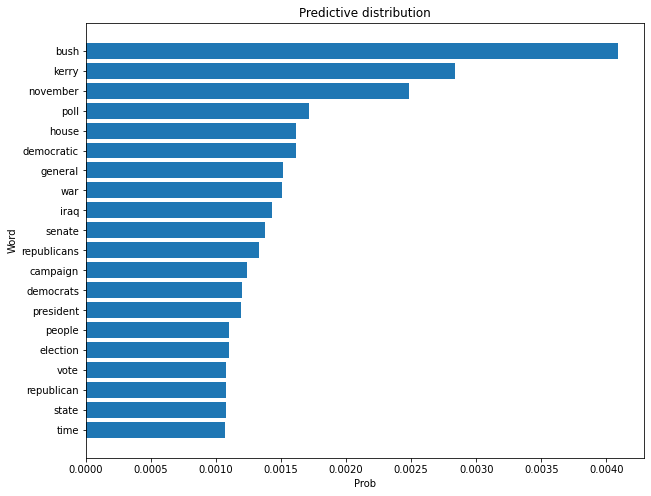

In [37]:
cutoff = 20
top_word_indices = np.argsort(posterior_freqs)[::-1][:cutoff]
top_frequencies = posterior_freqs[top_word_indices]
top_words = [word[0] for word in V[top_word_indices, 0]]

print(top_frequencies)

plt.figure(figsize=(10, 8))
plt.barh(top_words[::-1], top_frequencies[::-1])
plt.title("Predictive distribution")
plt.xlabel("Prob")
plt.ylabel("Word")

[0.0001039  0.0001039  0.0001039  0.0001039  0.0001039  0.0001039
 0.0001039  0.0001039  0.0001039  0.0001039  0.0001039  0.0001039
 0.0001039  0.0001039  0.00010494 0.00010494 0.00010494 0.00010494
 0.00010494 0.00010494]


Text(0.5, 0, 'Probability')

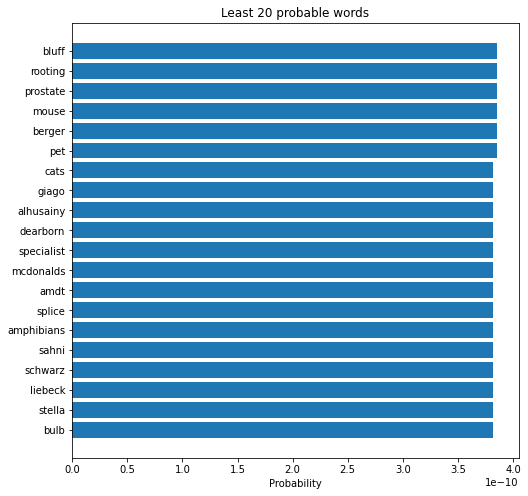

In [38]:
cutoff = 20
bottom_word_indices = np.argsort(posterior_freqs)[:cutoff]
bottom_frequencies = posterior_freqs[bottom_word_indices]
bottom_words = [word[0] for word in V[bottom_word_indices, 0]]

print(bottom_frequencies)

plt.figure(figsize=(8, 8))
plt.barh(bottom_words, bottom_frequencies/num_words)
plt.title("Least 20 probable words")
plt.xlabel("Probability")

In [119]:
doc_id = 2001
doc_indices = np.where(B[:, 0] == doc_id)  # get all occurrences of document d in the training data

doc_word_counts = np.zeros(W)

word_ids = np.array(B[doc_indices, 1])  # unique word id's in document d
counts = np.array(B[doc_indices, 2])  # counts of words in document d
doc_word_counts[word_ids-1] += counts  # marry correct ordering

n = np.sum(doc_word_counts).astype(int)

log_post_freqs = np.log(posterior_freqs)
log_prob = np.dot(doc_word_counts, log_post_freqs)

perplexity = np.exp(- log_prob / n)

print("Document {} has log probability: l={}".format(doc_id, log_prob))
print("Total n={} words in doc".format(n))
print("Perplexity p={}".format(perplexity))

Document 2001 has log probability: l=-3688.6211698172997
Total n=440 words in doc
Perplexity p=4373.110988104844


In [121]:
b_docs = np.max(B[:, 0])  # number of documents in A

# Initialization: assign each document a mixture component at random
b_word_counts = np.zeros(W)  # counts of each word

# Populate the count matrices by looping over documents
for doc in tqdm(range(b_docs)):
    doc_indices = np.where(B[:, 0] == doc+1)  # get all occurrences of document d in the training data
    word_ids = np.array(B[doc_indices, 1])  # unique word id's in document d
    counts = np.array(B[doc_indices, 2])  # counts of words in document d
    b_word_counts[word_ids-1] += counts  # number of times w is assigned to component k
print("complete")

b_num_words = np.sum(b_word_counts).astype(int)
b_word_frequencies = np.true_divide(b_word_counts, num_words)

print("W={} distinct words".format(W))
print("N={} total words".format(b_num_words))

log_prob_b = np.dot(b_word_counts, log_post_freqs)
perplexity_b = np.exp( - log_prob_b / b_num_words)

print("Perplexity p={}".format(perplexity_b))
print(log_prob_b)

100%|██████████| 3430/3430 [00:00<00:00, 14574.22it/s]

complete
W=6906 distinct words
N=195816 total words
Perplexity p=2683.984070350858
-1545978.5917629278


In [22]:
from bmm import BMM

np.random.seed(278)

gibbs_iters = 50
K = 20  # number of clusters
alpha = 10  # parameter of the Dirichlet over mixture components
gamma = .1  # parameter of the Dirichlet over words
perplexity, swk, sk_docs_over_time = BMM(A, B, K, alpha, gamma, gibbs_iters)
print("Perplexity: {}".format(perplexity))

Looping through documents to populate count matrices...


100%|██████████| 2000/2000 [00:00<00:00, 9563.84it/s]


Gibbs sampling...


100%|██████████| 50/50 [01:13<00:00,  1.47s/it]


Test Documents...


100%|██████████| 1430/1430 [00:01<00:00, 749.25it/s]

Perplexity: 2116.827139192565


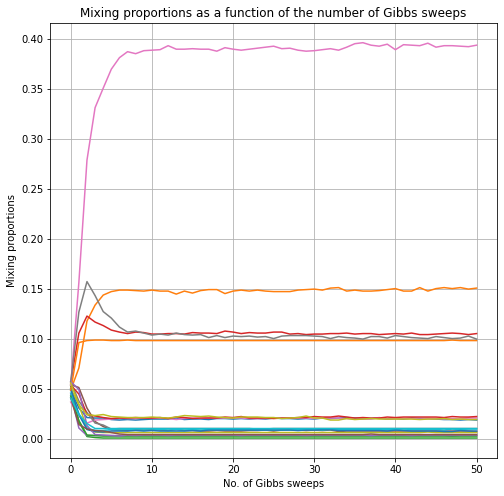

In [23]:
points=50
cutoff = 0.05
iters = range(0, points+1)
plt.figure(figsize=(8, 8))
D = np.sum(sk_docs_over_time[:, 0])
for k in range(0, K):
    vals = sk_docs_over_time[k, 0:points+1] / D
    mean = np.mean(vals)
    label = str(k+1) if mean > cutoff else ""
    plt.plot(iters, vals, label=label)

plt.grid()
plt.title("Mixing proportions as a function of the number of Gibbs sweeps")
plt.xlabel("No. of Gibbs sweeps")
plt.ylabel("Mixing proportions")
plt.show()

In [5]:
from lda import LDA

seed=1
np.random.seed(seed)

K = 20  # number of clusters
alpha = 1  # parameter of the Dirichlet over mixture components
gamma = .1  # parameter of the Dirichlet over words

num_iters = 50
perplexity, swk = LDA(A, B, K, alpha, gamma, num_iters)

Iterating over documents...


100%|██████████| 2000/2000 [00:13<00:00, 145.30it/s]


Gibbs sampling through all Training docs and words...


100%|██████████| 50/50 [16:21<00:00, 19.64s/it]


Computing perplexity for Test set...


100%|██████████| 1430/1430 [01:30<00:00, 15.72it/s]


In [7]:
perplexity

array([1701.09731505])

In [8]:
from lda import gen_posterior

W = np.max([np.max(A[:, 1]), np.max(B[:, 1])])  # total number of unique words
D = np.max(A[:, 0])  # number of documents in A
K = 20
alpha = 1  # parameter of the Dirichlet over mixture components
gamma = .1  # parameter of the Dirichlet over words
num_gibbs_iters = 50
swk, sk, word_counts_by_id_topic_it, topic_counts_by_id_doc_it = gen_posterior(A, W, D, K, alpha, gamma, num_gibbs_iters)

Iterating over documents...


100%|██████████| 2000/2000 [00:13<00:00, 146.46it/s]


Gibbs sampling through all Training docs and words...


100%|██████████| 50/50 [16:33<00:00, 19.86s/it]


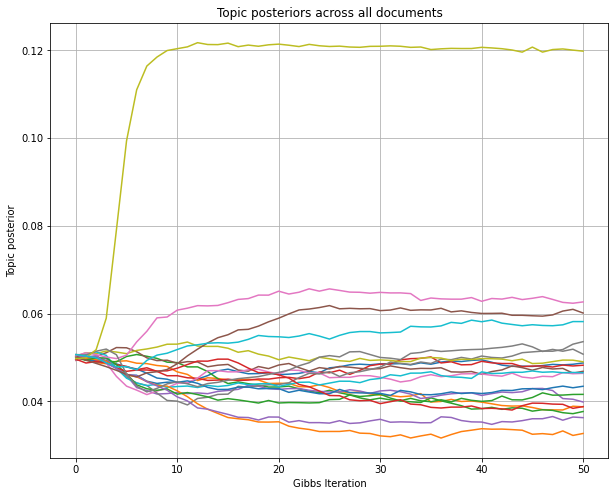

In [19]:
points=50
cutoff = 0.05
iters = range(0, points+1)
plt.figure(figsize=(10,8))
N = np.sum(topic_counts_by_id_doc_it[:, :, 0]) + K*alpha
for k in range(0, K):
    vals = np.sum(topic_counts_by_id_doc_it[k, :, 0:points+1], axis=0) + alpha
    vals = vals / N
    mean = np.mean(vals)
    label = str(k+1) if mean > cutoff else ""
    plt.plot(iters, vals, label=label)

plt.grid()
plt.title("Topic posteriors across all documents")
plt.xlabel("Gibbs Iteration")
plt.ylabel("Topic posterior")
plt.show()

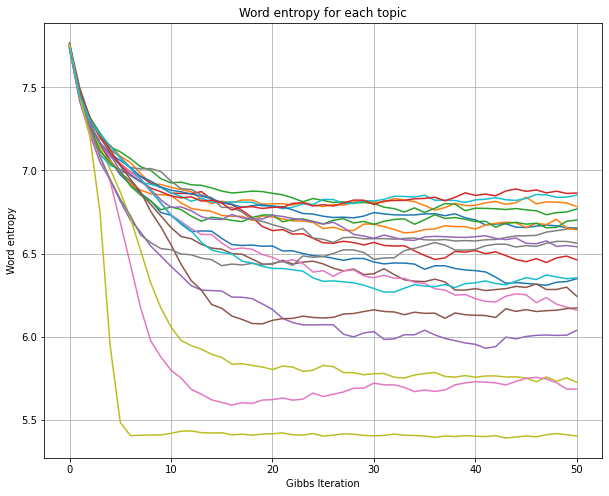

In [23]:
def compute_entropy(vector):
    scale = np.sum(vector)
    normalised = vector / scale
    return - np.dot(normalised, np.log(normalised))

topic_entropies = np.zeros((K, num_gibbs_iters+1))
for k in range(0, K):
    for it in range(0, num_gibbs_iters + 1):
        entropy = compute_entropy(word_counts_by_id_topic_it[:, k, it] + gamma)
        topic_entropies[k, it] = entropy

plt.figure(figsize=(10,8))
num_points = 50
iters = range(0, num_points+1)
cutoff = 6
for k in range(0, K):
    vals = topic_entropies[k, 0:num_points+1]
    mean = np.mean(vals)
    label = str(k+1) if mean < cutoff else ""
    plt.plot(iters, vals, label=label)

plt.grid()
plt.title("Word entropy for each topic")
plt.xlabel("Gibbs Iteration")
plt.ylabel("Word entropy")
plt.show()